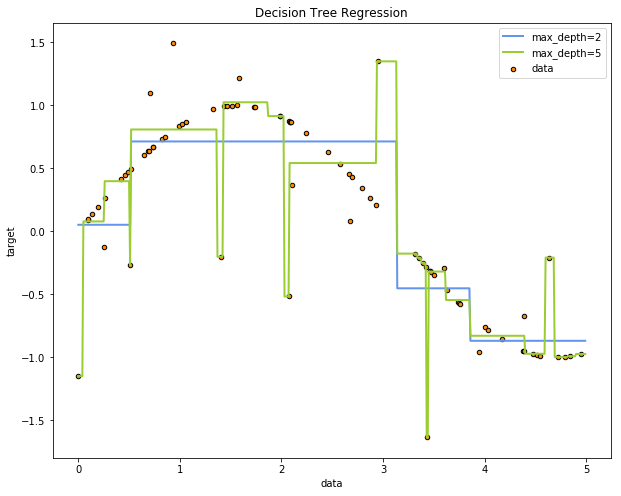

In [1]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Regularlization

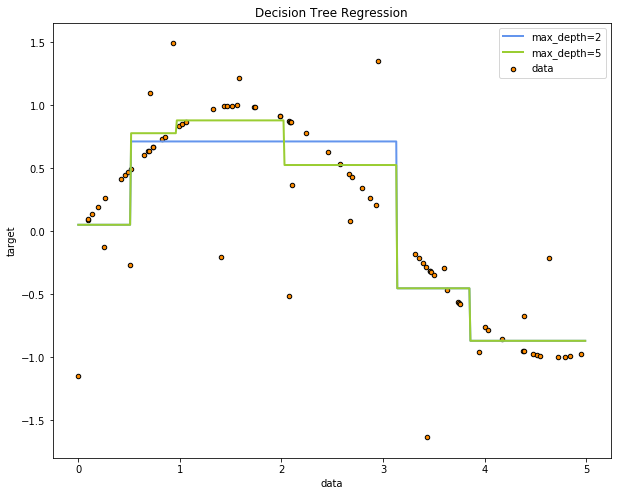

In [2]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Overfitted data

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [4]:
X = iris.data[:, 0:2]
y = iris.target
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X, y)

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

In [6]:
from sklearn.tree import graphviz
graph=graphviz.Source(dot_data)

ImportError: cannot import name 'graphviz' from 'sklearn.tree' (C:\Users\SANDY\Anaconda3\envs\ml_2020\lib\site-packages\sklearn\tree\__init__.py)

# End-To-End modelling

In [7]:
from sklearn.datasets import make_moons

In [8]:
X_data,Y_data=make_moons(n_samples=1000,random_state=42,noise=0.5)

In [9]:
cl1=tree.DecisionTreeClassifier(random_state=42)
cl2=tree.DecisionTreeClassifier(min_samples_leaf=10,random_state=42)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.1,random_state=42)

In [12]:
from sklearn.model_selection import GridSearchCV

In [15]:
params={'min_samples_leaf': list(range(5,20))}

In [17]:
grid=GridSearchCV(cl1,params,verbose=1,n_jobs=-1)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14

In [18]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_pred=grid.predict(X_test)
accuracy_score(Y_test,y_pred)

0.83

# accuracy score without grid search

In [23]:
cl1.fit(X_train,Y_train)
y_pred=cl1.predict(X_test)
accuracy_score(Y_test,y_pred)

0.74